# Pie Charts, Box Plots, Scatter Plots, and Bubble Plots

The first and most significant step is to import the important libraries. We will use the inline backend to generate the plots within the browser.

### Importing the Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

#use the inline backend to generate plots within the browser
%matplotlib inline

print('Done')

Done


## Data Sourcing/Fetching

The data is the Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows) from United Nation's website

We will focus on the Canadian Immigration data and use the **already cleaned dataset** and can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv">here</a>.<br><br>

I also have the cleaned dataset saved in my system already but we will be getting the dataset from the link below:

In [3]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's see the first five rows of the dataframe 

In [4]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Let's find out how many entries there are in our dataset.


In [5]:
df_can.shape

(195, 39)

# Visualizing Data using Matplotlib<a id="4"></a>


We well change the index column and make the country column the index column. This will make the plotting very easy.

In [6]:
df_can.set_index('Country', inplace=True)

Let's see how the first five rows of the dataframe will now look like.

In [7]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Now let's check for the dimensions of the dataframe

In [8]:
print('The dimension of the dataframe is: ', df_can.shape)

The dimension of the dataframe is:  (195, 38)


From the above dataframe, it is best we create a list of the years we will be working with. This will enable us streamline the years needed for the plots we will be constructing. The years will be from 1980 to 2013.

In [9]:
years = list(map(str, range(1980, 2014)))

# Pie Charts <a id="6"></a>

A `pie chart` is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the `kind=pie` keyword.

Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.


Step 1: Gather data.

We will use *pandas* `groupby` method to summarize the immigration data by `Continent`. The general process of `groupby` involves the following steps:

1.  **Split:** Splitting the data into groups based on some criteria.
2.  **Apply:** Applying a function to each group independently:
    .sum()
    .count()
    .mean()
    .std()
    .aggregate()
    .apply()
    .etc..
3.  **Combine:** Combining the results into a data structure.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig4SplitApplyCombine.png" height="400" align="center">


In [10]:
# The diagram above can be illustrated below using the groupby and .sum() function
df_C = df_can.groupby('Continent', axis=0).sum()

C:\Users\OBIRIFUL1\AppData\Local\Temp\ipykernel_12332\4051781494.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_C = df_can.groupby('Continent', axis=0).sum()


In [11]:
print(type(df_can.groupby('Continent', axis=0)))

df_C

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


Step 2: Plot the data. We will pass in `kind = 'pie'` keyword, along with the following additional parameters:

*   `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
*   `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
*   `shadow` - Draws a shadow beneath the pie (to give a 3D feel).


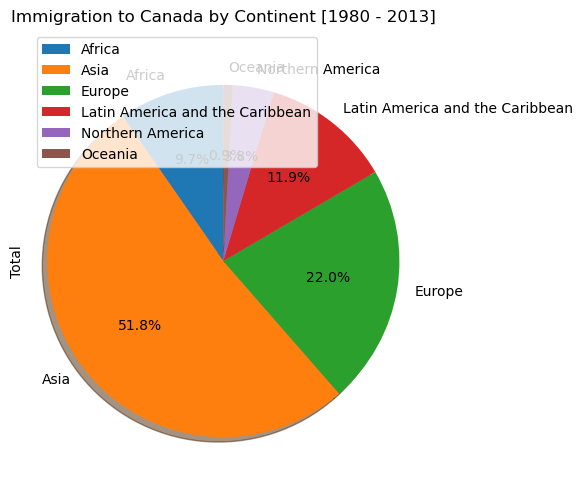

In [13]:
df_C['Total'].plot(kind='pie', figsize=(5,6), startangle=90, shadow=True, autopct='%1.1f%%')

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal')
plt.legend(labels=df_C.index, loc='upper left')

plt.show()

The above visual is not very clear, the numbers and text overlap in some instances. Let's make a few modifications to improve the visuals:

*   Remove the text labels on the pie chart by passing in `legend` and add it as a seperate legend using `plt.legend()`.
*   Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.
*   Pass in a custom set of colors for continents by passing in `colors` parameter.
*   **Explode** the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Caribbean) by passing in `explode` parameter.


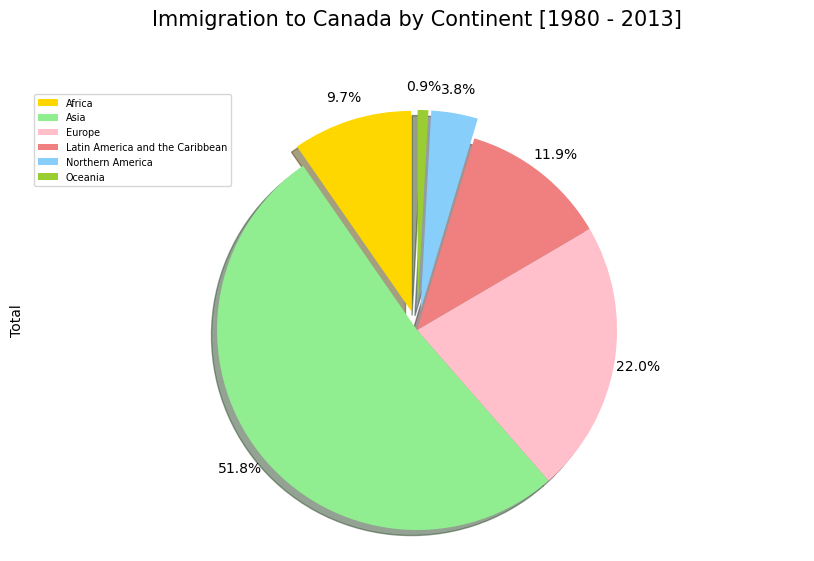

In [16]:
colors_list = ['gold', 'lightgreen', 'pink', 'lightcoral', 'lightskyblue', 'yellowgreen']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_C['Total'].plot(kind = 'pie',
                  figsize=(10,6),
                  autopct = '%1.1f%%',
                  startangle=90,
                   labels=None,
                  pctdistance=1.12,
                  colors=colors_list,
                  explode=explode_list,
                  shadow=True)

plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12, fontsize=15)

plt.axis('equal')

plt.legend(labels=df_C.index, loc='upper left', fontsize=7)

plt.show()

**Question:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note**: I might need to play with the explore values in order to fix any overlapping slice values.


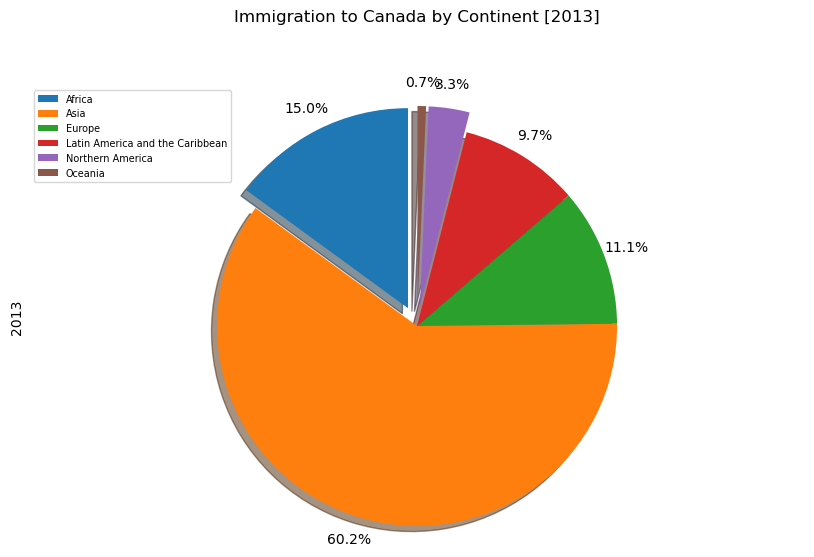

In [24]:
explose_list = [0, 0, 0, 0.1, 0.1, 0.3]

df_C['2013'].plot(kind = 'pie',
                  figsize=(10,6),
                  autopct = '%1.1f%%',
                  startangle=90,
                   labels=None,
                  pctdistance=1.12,
                  explode=explode_list,
                  shadow=True)

plt.title('Immigration to Canada by Continent [2013]', y=1.12)

plt.axis('equal')

plt.legend(labels=df_C.index, loc='upper left', fontsize=7)

plt.show()

# Box Plots <a id="8"></a>

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions:

*   **Minimum:** The smallest number in the dataset excluding the outliers.
*   **First quartile:** Middle number between the `minimum` and the `median`.
*   **Second quartile (Median):** Middle number of the (sorted) dataset.
*   **Third quartile:** Middle number between `median` and `maximum`.
*   **Maximum:** The largest number in the dataset excluding the outliers.


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/boxplot_complete.png" width="440," align="center">


To make a `boxplot`, we can use `kind=box` in `plot` method invoked on a *pandas* series or dataframe.

Let's plot the box plot for the Japanese immigrants between 1980 - 2013.


Step 1: Get the subset of the dataset. Even though we are extracting the data for just one country, we will obtain it as a dataframe. This will help us with calling the `dataframe.describe()` method to view the percentiles.


In [25]:
df_Japan = df_can.loc[['Japan'], years].transpose()
df_Japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


In [26]:
# checking the statistical properties of the dataset
df_Japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Step 2: Plot by passing in `kind='box'`.


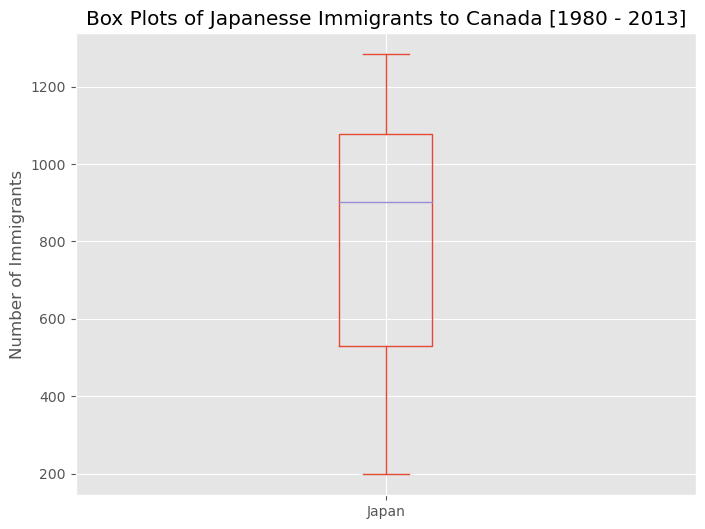

In [32]:
df_Japan.plot(kind='box', figsize=(8,6))

plt.title('Box Plots of Japanesse Immigrants to Canada [1980 - 2013]')
plt.ylabel('Number of Immigrants')

plt.show()

We can immediately make a few key observations from the plot above:

1.  The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and  median number of immigrants is around 900 (median).
2.  25% of the years for period 1980 - 2013 had an annual immigrant count of \~500 or fewer (First quartile).
3.  75% of the years for period 1980 - 2013 had an annual immigrant count of \~1100 or fewer (Third quartile).

We can view the actual numbers by calling the `describe()` method on the dataframe.


In [28]:
df_Japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


One of the key benefits of box plots is the ability of comparing the distribution of multiple datasets. Let's analyze the two countries called China and India using box plots because it seems they had very similar immigration trends.

**Question:** Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.


In [29]:
df_CI = df_can.loc[['China', 'India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


Let's view the percentiles associated with both countries using the `describe()` method.


In [30]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


Step 2: Plot data.


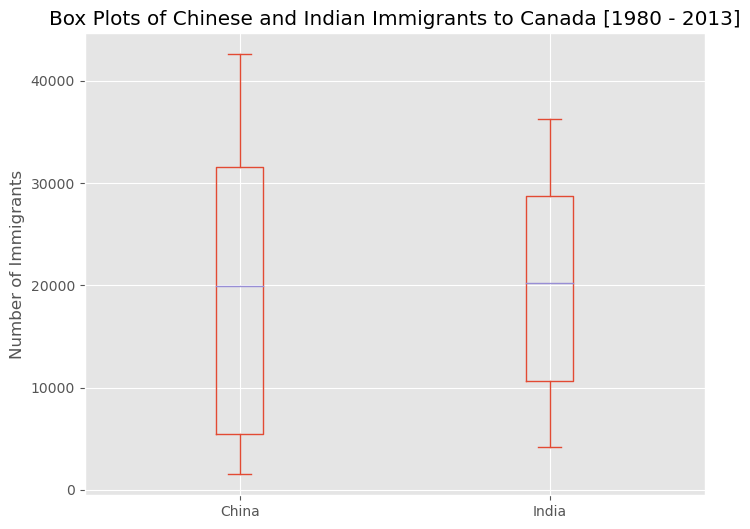

In [33]:
df_CI.plot(kind='box', figsize=(8,6))

plt.title('Box Plots of Chinese and Indian Immigrants to Canada [1980 - 2013]')
plt.ylabel('Number of Immigrants')

plt.show()

We can observe that, while both countries have around the same median immigrant population (\~20,000),  China's immigrant population range is more spread out than India's. The maximum population from India for any year (36,210) is around 15% lower than the maximum population from China (42,584).


Let's create a horizontal box plots. This is done by passing the `vert` parameter in the **plot** function and assign it to *False*. We can also specify a different color in case you are not a big fan of the default red color.


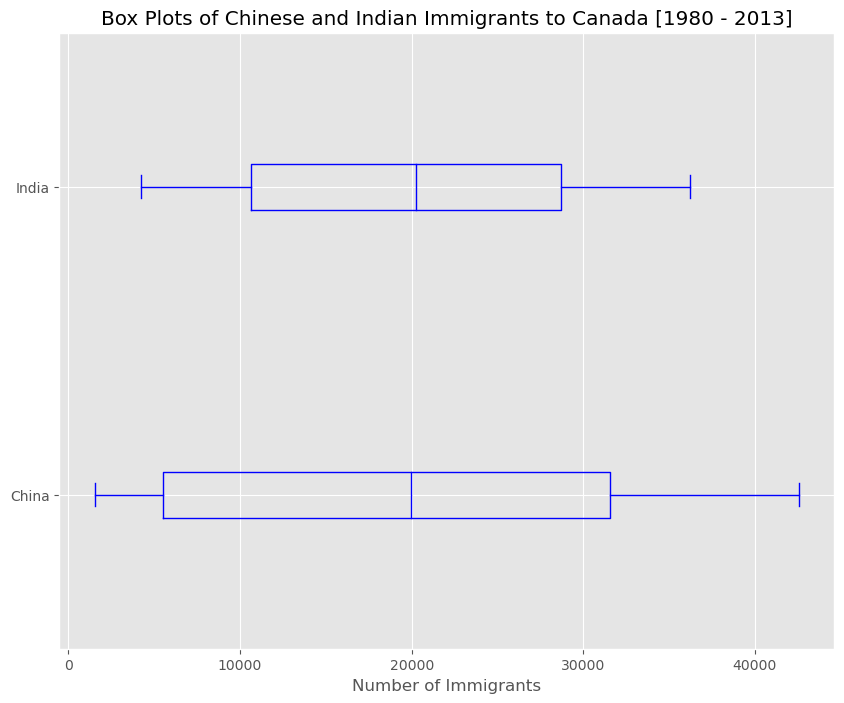

In [34]:
df_CI.plot(kind='box', figsize=(10,8), vert=False, color ='blue')

plt.title('Box Plots of Chinese and Indian Immigrants to Canada [1980 - 2013]')
plt.xlabel('Number of Immigrants')

plt.show()

**Subplots**

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**.

Typical syntax is : <br>

```python
    fig = plt.figure()
    ax = fig.add_subplot(nrows, ncols, plot_number)
```

Where

*   `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,
*   `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` \* `ncols` as shown below.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig5Subplots_V2.png" width="500" align="center">


We can then specify which subplot to place each plot by passing in the `ax` paramemter in `plot()` method as follows:


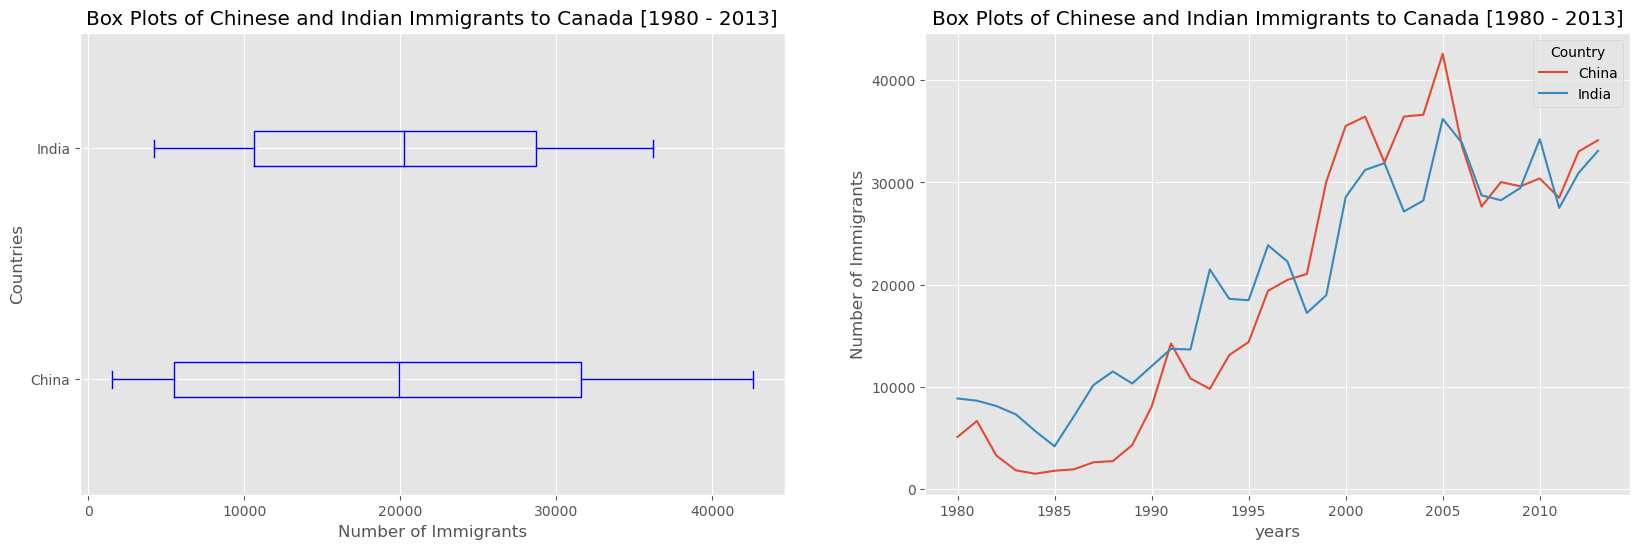

In [35]:
fig = plt.figure()

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_CI.plot(kind='box', figsize=(20,6), vert=False, color ='blue', ax=ax0)     #for boxplot
ax0.set_title('Box Plots of Chinese and Indian Immigrants to Canada [1980 - 2013]')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

df_CI.plot(kind='line', figsize=(20,6), ax=ax1)         #for line plots
ax1.set_title('Box Plots of Chinese and Indian Immigrants to Canada [1980 - 2013]')
ax1.set_xlabel('years')
ax1.set_ylabel('Number of Immigrants')

plt.show()

**Tip regarding subplot convention**

In the case when `nrows`, `ncols`, and `plot_number` are all less than 10, a convenience exists such that a 3-digit number can be given instead, where the hundreds represent `nrows`, the tens represent `ncols` and the units represent `plot_number`. For instance,

```python
   subplot(211) == subplot(2, 1, 1) 
```

produces a subaxes in a figure which represents the top plot (i.e. the first) in a 2 rows by 1 column notional grid (no grid actually exists, but conceptually this is how the returned subplot has been positioned).


Let's try something a little more advanced.

Previously we identified the top 15 countries based on total immigration from 1980 - 2013.

**Question:** Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the *decades* `1980s`, `1990s`, and `2000s`.


Step 1: Get the dataset. Get the top 15 countries based on Total immigrant population. Name the dataframe **df_top15**.


In [41]:
df_top15 = df_can.sort_values(by='Total', ascending=True, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Palau,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Tuvalu,Oceania,Polynesia,Developing regions,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,8
Sao Tome and Principe,Africa,Middle Africa,Developing regions,0,0,0,0,0,0,0,...,1,1,0,0,1,2,0,0,1,10
Vanuatu,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,11


Step 2: Create a new dataframe which contains the aggregate for each decade. One way to do that:

1.  Create a list of all years in decades 80's, 90's, and 00's.
2.  Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
3.  Merge the three series into a new data frame. Call your dataframe **new_df**.


In [42]:
y_80 = list(map(str, range(1980,1990)))
y_90 = list(map(str, range(1990, 2000)))
y_00 = list(map(str, range(2000,2010)))

print('Done')

Done


In [43]:
df_80 = df_top15.loc[:, y_80].sum(axis=1)
df_90 = df_top15.loc[:, y_90].sum(axis=1)
df_00 = df_top15.loc[:, y_00].sum(axis=1)

print('Done')

Done


In [44]:
new_df = pd.DataFrame({'1980s': df_80, '1990s':df_90, '2000s':df_00})
new_df

,1980s,1990s,2000s
Country,,,
Palau,0,0,1
Marshall Islands,0,0,2
Western Sahara,0,1,1
San Marino,2,1,1
New Caledonia,0,0,3
American Samoa,3,2,1
Tuvalu,3,1,3
Sao Tome and Principe,0,2,5
Vanuatu,0,5,6


Let's learn more about the statistics associated with the dataframe using the `describe()` method.


In [50]:
new_df.describe()

,index,1980s,1990s,2000s
count,15.000000,15.000000,15.000000,15.000000
mean,7.000000,1.266667,3.733333,4.533333
std,4.472136,1.334523,4.431489,4.290632
min,0.000000,0.000000,0.000000,0.000000
25%,3.500000,0.000000,1.000000,1.000000
50%,7.000000,1.000000,2.000000,3.000000
75%,10.500000,2.500000,5.500000,5.500000
max,14.000000,3.000000,16.000000,14.000000


Step 3: Plot the box plots.


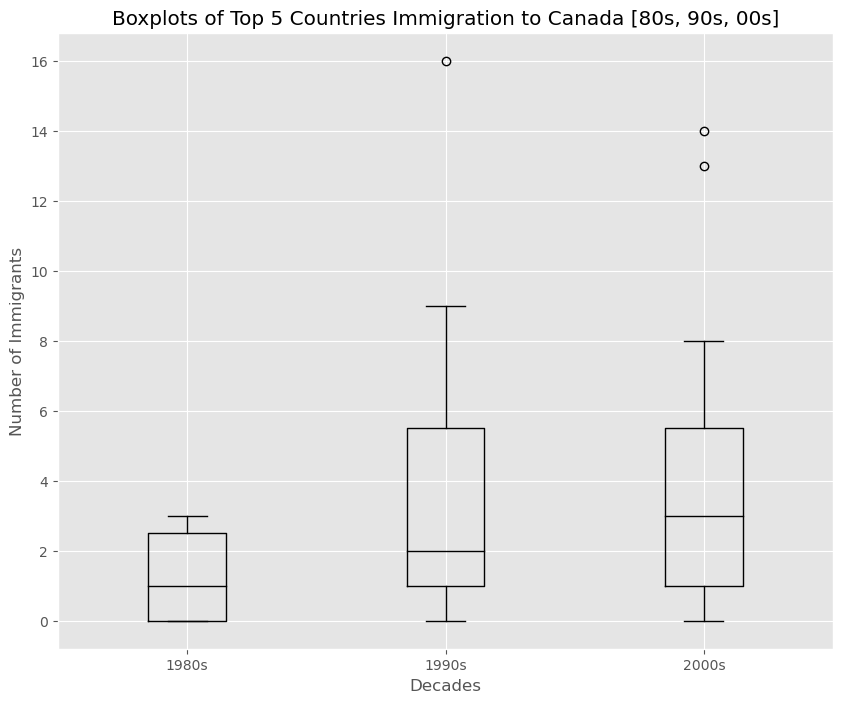

In [46]:
new_df.plot(kind='box', figsize=(10,8), color='black')

plt.title('Boxplots of Top 5 Countries Immigration to Canada [80s, 90s, 00s]')
plt.xlabel('Decades')
plt.ylabel('Number of Immigrants')

plt.show()

Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:<br>

*   larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
*   smaller than Q1 by at least 1.5 times the IQR.

Let's look at decade 2000s as an example: <br>

*   Q1 (25%) = 36,101.5 <br>
*   Q3 (75%) = 105,505.5 <br>
*   IQR = Q3 - Q1 = 69,404 <br>

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 105,505.5 + (1.5 \* 69,404) <br>
Outlier > 209,611.5


# Scatter Plots <a id="10"></a>

A `scatter plot` (2D) is a useful method of comparing variables against each other. `Scatter` plots look similar to `line plots` in that they both map independent and dependent variables on a 2D graph. While the data points are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

Let's start by exploring the following:

Using a `scatter plot`, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.


Step 1: Get the dataset. Since we are expecting to use the relationship betewen `years` and `total population`, we will convert `years` to `int` type.


In [52]:
# We will use the sum method to get the total population per year
df_sum = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type integer
df_sum.index = map(int, df_sum.index)

# checking to see how the dataset looks like
df_sum.head()

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417


In [53]:
# Reset the index to put it back in as a column
df_sum.reset_index(inplace=True)

# set the columns names to year and total
df_sum.columns = ['year', 'total']

df_sum.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Step 2: Plot the data. In `Matplotlib`, we can create a `scatter` plot set by passing in `kind='scatter'` as plot argument. We will also need to pass in `x` and `y` keywords to specify the columns that go on the x- and the y-axis.


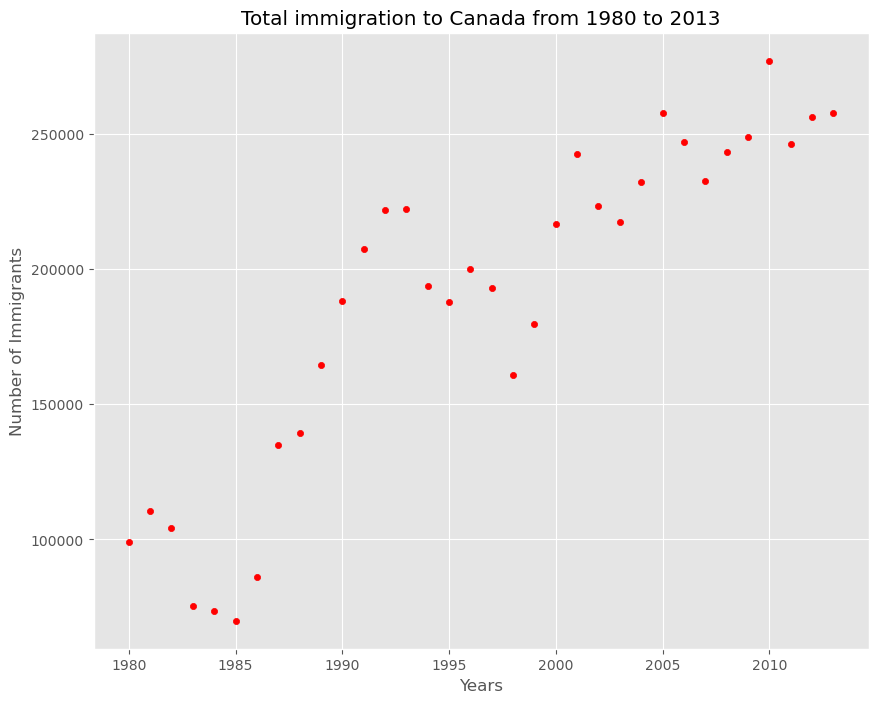

In [55]:
df_sum.plot(kind='scatter', x='year', y='total', figsize=(10,8), color = 'r')

plt.title('Total immigration to Canada from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()

Notice how the scatter plot does not connect the data  points together. We can clearly observe an upward trend in the data: as the years go by, the total number of immigrants increases. We can mathematically analyze this upward trend using a regression line (line of best fit).


So let's try to plot a linear line of best fit, and use it to  predict the number of immigrants in 2015.

Step 1: Get the equation of line of best fit. We will use **Numpy**'s `polyfit()` method by passing in the following:

*   `x`: x-coordinates of the data.
*   `y`: y-coordinates of the data.
*   `deg`: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.


In [56]:
x = df_sum['year']
y = df_sum['total']

fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression `y= a * x + b`, our output has 2 elements `[5.56709228e+03, -1.09261952e+07]` with the the slope in position 0 and intercept in position 1.

Step 2: Plot the regression line on the `scatter plot`.


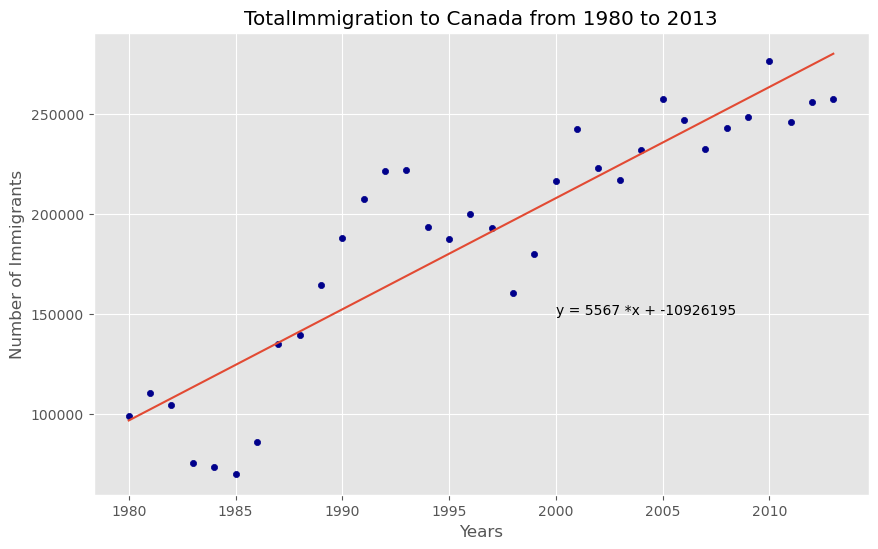

'No. Immigrants = 5567 * Year + -10926195'

In [57]:
df_sum.plot(kind='scatter', x='year', y='total', figsize=(10,6), color='darkblue')

plt.title('TotalImmigration to Canada from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.plot(x, fit[0] *x + fit[1])
plt.annotate('y = {0:.0f} *x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

Using the equation of line of best fit, we can estimate the number of immigrants in 2015:

```python
No. Immigrants = 5567 * Year - 10926195
No. Immigrants = 5567 * 2015 - 10926195
No. Immigrants = 291,310
```


**Question**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?


**Step 1**: Get the data:

1.  Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
2.  Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.
3.  Reset the index in place.
4.  Rename the columns to **year** and **total**.
5.  Display the resulting dataframe.


In [59]:
# creating a dataframe consisting of the numbers associated with Denmark, Norway and Sweden
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# creating a dataframe for the sum of immigrants across all three countries
df_total = pd.DataFrame(df_countries.sum(axis=1))

# reset the index in place
df_total.reset_index(inplace=True)

# rename the columns to year and total
df_total.columns = ['year', 'total']

# change the data type of the year to int to avoid overlapping in the scatter plot
df_total['year'] = df_total['year'].astype(int)

# Display tyhe first five rows of the resulting dataframe 
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


**Step 2**: Generate the scatter plot by plotting the total versus year in **df_total**.


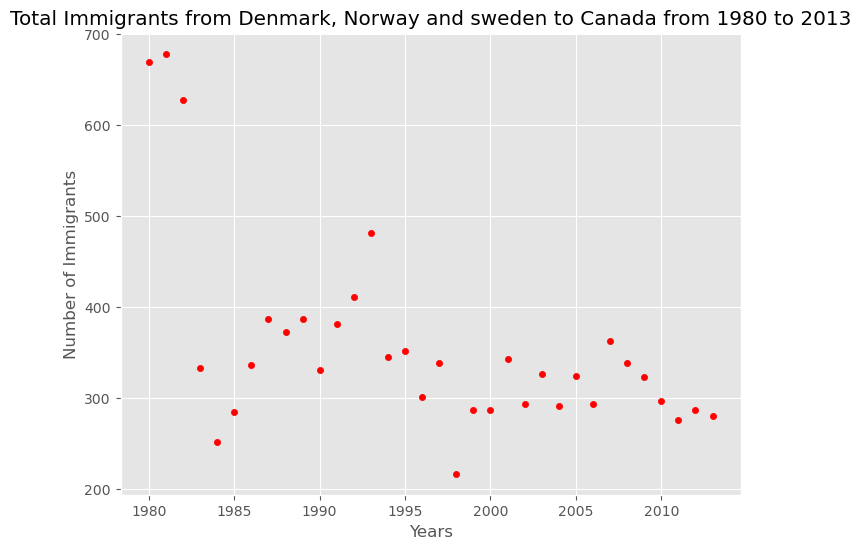

In [60]:
df_total.plot(kind ='scatter', x='year', y='total', figsize=(8,6), color = 'r')

plt.title('Total Immigrants from Denmark, Norway and sweden to Canada from 1980 to 2013')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

# Bubble Plots <a id="12"></a>

A `bubble plot` is a variation of the `scatter plot` that displays three dimensions of data (x, y, z). The data points are replaced with bubbles, and the size of the bubble is determined by the third variable `z`, also known as the weight. In `maplotlib`, we can pass in an array or scalar to the parameter `s` to `plot()`, that contains the weight of each point.

**Let's start by analyzing the effect of Argentina's great depression**.

Argentina suffered a great depression from 1998 to 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a `bubble plot` of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the *normalized* value of the population for each year.


**Step 1**: Get the data for Brazil and Argentina. Like in the previous example, we will convert the `Years` to type int and include it in the dataframe.


In [61]:
#We will first transpose the dataframe

df_BA = df_can[years].transpose()

In [63]:
# Change the index(year) to datatype int

df_BA.index = map(int, df_BA.index)
df_BA.head(2)

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
1980,16,1,80,0,0,1,0,368,0,702,...,9378,128,0,0,103,1191,0,1,11,72
1981,39,0,67,1,0,3,0,426,0,639,...,10030,132,0,0,117,1829,0,2,17,114


In [64]:
# Change the index name to 'year'

df_BA.index.name = 'Year'

In [65]:
# Reset the index so that the yaer will become a column

df_BA.reset_index(inplace=True)
df_BA.head(2)

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114


**Step 2**: Create the normalized weights.

There are several methods of normalizations in statistics, each with its own use. In this case, we will use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) to bring all values into the range \[0, 1]. The general formula is:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig3FeatureScaling.png" align="center">

where $X$ is the original value, $X'$ is the corresponding normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the data points are scaled to a value between 0-1 accordingly.


In [67]:
# normalizing brazil data
norm_brazil = (df_BA['Brazil'] - df_BA['Brazil'].min())/(df_BA['Brazil'].max() - df_BA['Brazil'].min())

# normalizing argentina data
norm_argentina = (df_BA['Argentina'] - df_BA['Argentina'].min())/(df_BA['Argentina'].max() - df_BA['Argentina'].min())

**Step 3**: Plot the data.

*   To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the `ax` parameter.
*   We will also pass in the weights using the `s` parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore, we will:
    *   multiply weights by 2000 to scale it up on the graph, and,
    *   add 10 to compensate for the min value (which has a 0 weight and therefore scale with $\times 2000$).


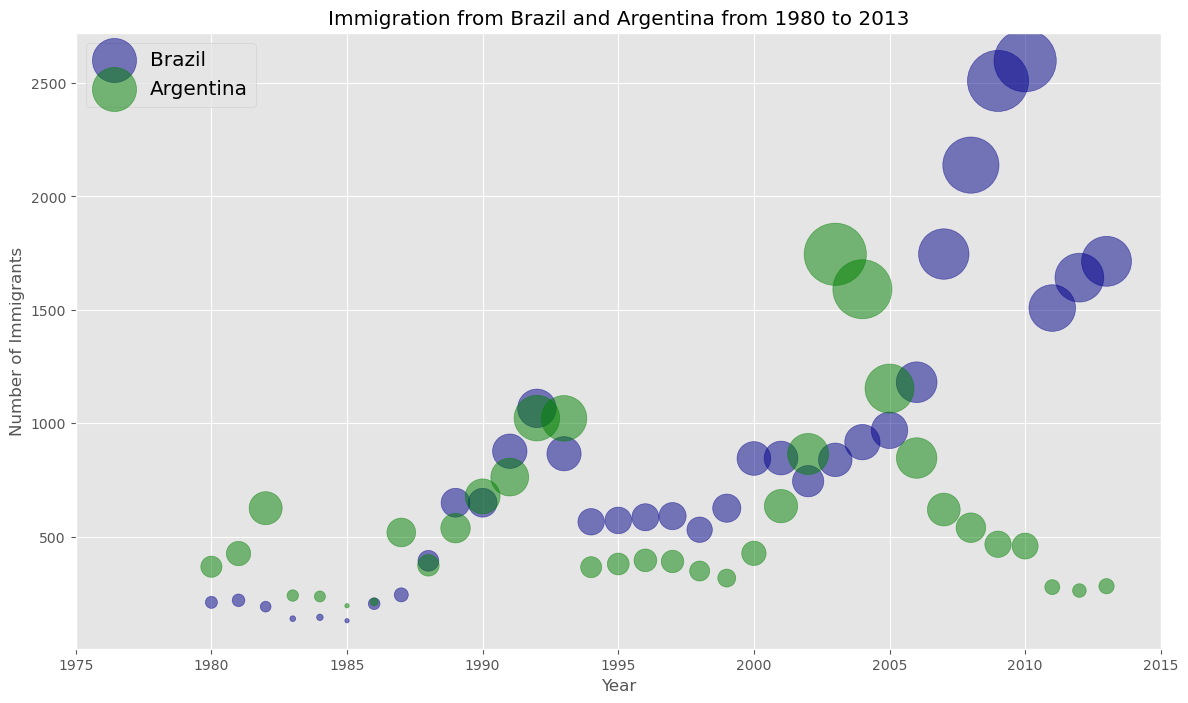

In [70]:
ax0 = df_BA.plot(kind='scatter', x='Year', y='Brazil', color='darkblue',
                alpha=0.5, s = norm_brazil * 2000 + 10,
                xlim=(1975, 2015), figsize=(14,8))

ax1 = df_BA.plot(kind='scatter', x='Year', y='Argentina', color ='green',
                alpha=0.5, s = norm_argentina * 2000 + 10,
                xlim=(1975, 2015),
                ax=ax0)

ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.set_ylabel('Number of Immigrants')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble is, the more immigrants are in that year.

From the plot above, we can see a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. We can also observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 to 1990, just before the onset of 1998 - 2002 great depression.

On a similar note, Brazil suffered the *Samba Effect* where the Brazilian real (currency) dropped nearly 35% in 1999. There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. The immigration data reflect these events.


**Question**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_BA** that we defined and used in the previous example.


In [73]:
df_BA.head(3)

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102


Step 1: Normalize the data pertaining to China and India.


In [74]:
norm_china = (df_BA['China'] - df_BA['China'].min()) / (df_BA['China'].max() - df_BA['China'].min())

norm_india = (df_BA['India'] - df_BA['India'].min()) / (df_BA['India'].max() - df_BA['India'].min())

Step 2: Generate the bubble plots.


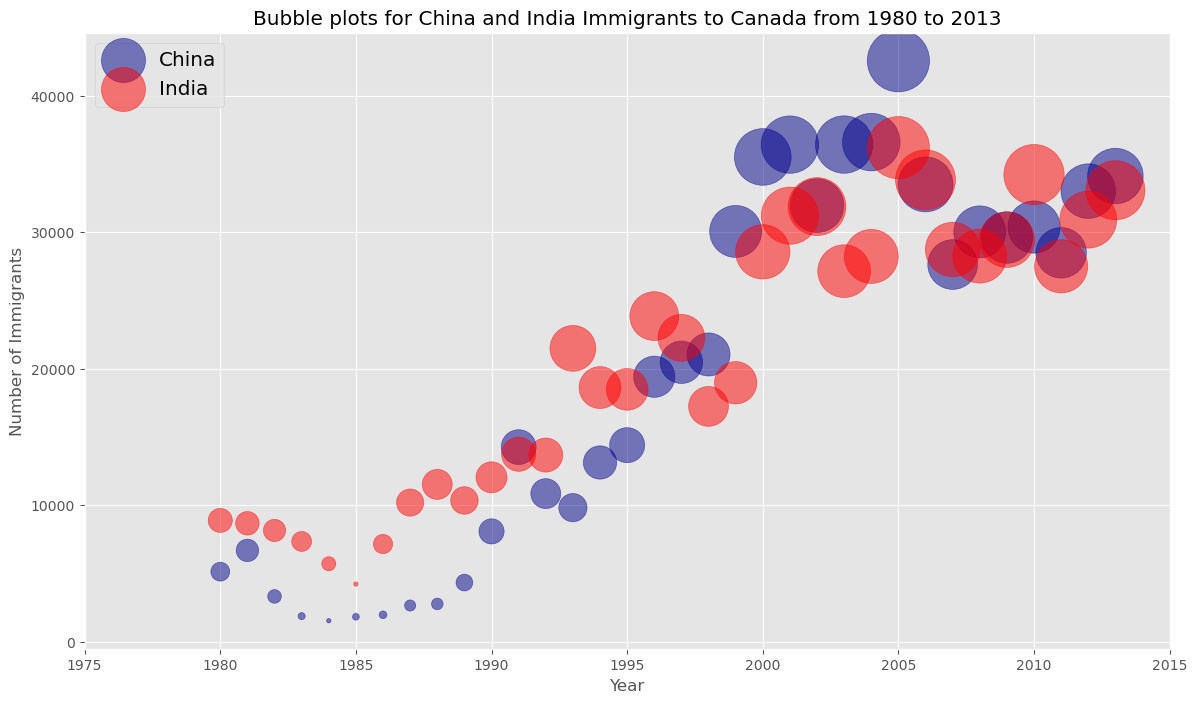

In [75]:
ax0 = df_BA.plot(kind ='scatter', x='Year', y='China', figsize=(14,8), alpha=0.5, color='darkblue', 
                s = norm_china * 2000 + 10, xlim = (1975, 2015))

ax1 = df_BA.plot(kind ='scatter', x='Year', y='India', figsize=(14,8), alpha=0.5, color='red', 
                s = norm_india * 2000 + 10, xlim = (1975, 2015), ax=ax0)

ax0.set_title('Bubble plots for China and India Immigrants to Canada from 1980 to 2013')
ax0.set_ylabel('Number of Immigrants')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

# Author:

## Ajoku Obinna Sunday